In [27]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

import gala.potential as gp
from gala.units import galactic

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [25]:
mw = gp.MilkyWayPotential2022()
mw

<CompositePotential disk,bulge,nucleus,halo>

In [139]:
nfw = gp.NFWPotential(m=sum([mw[comp].parameters['m'] for comp in mw]),
                      r_s=10 * u.kpc, units=galactic, a=0.25)
nfw

<NFWPotential: m=6.09e+11, r_s=10.00, a=0.25, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>

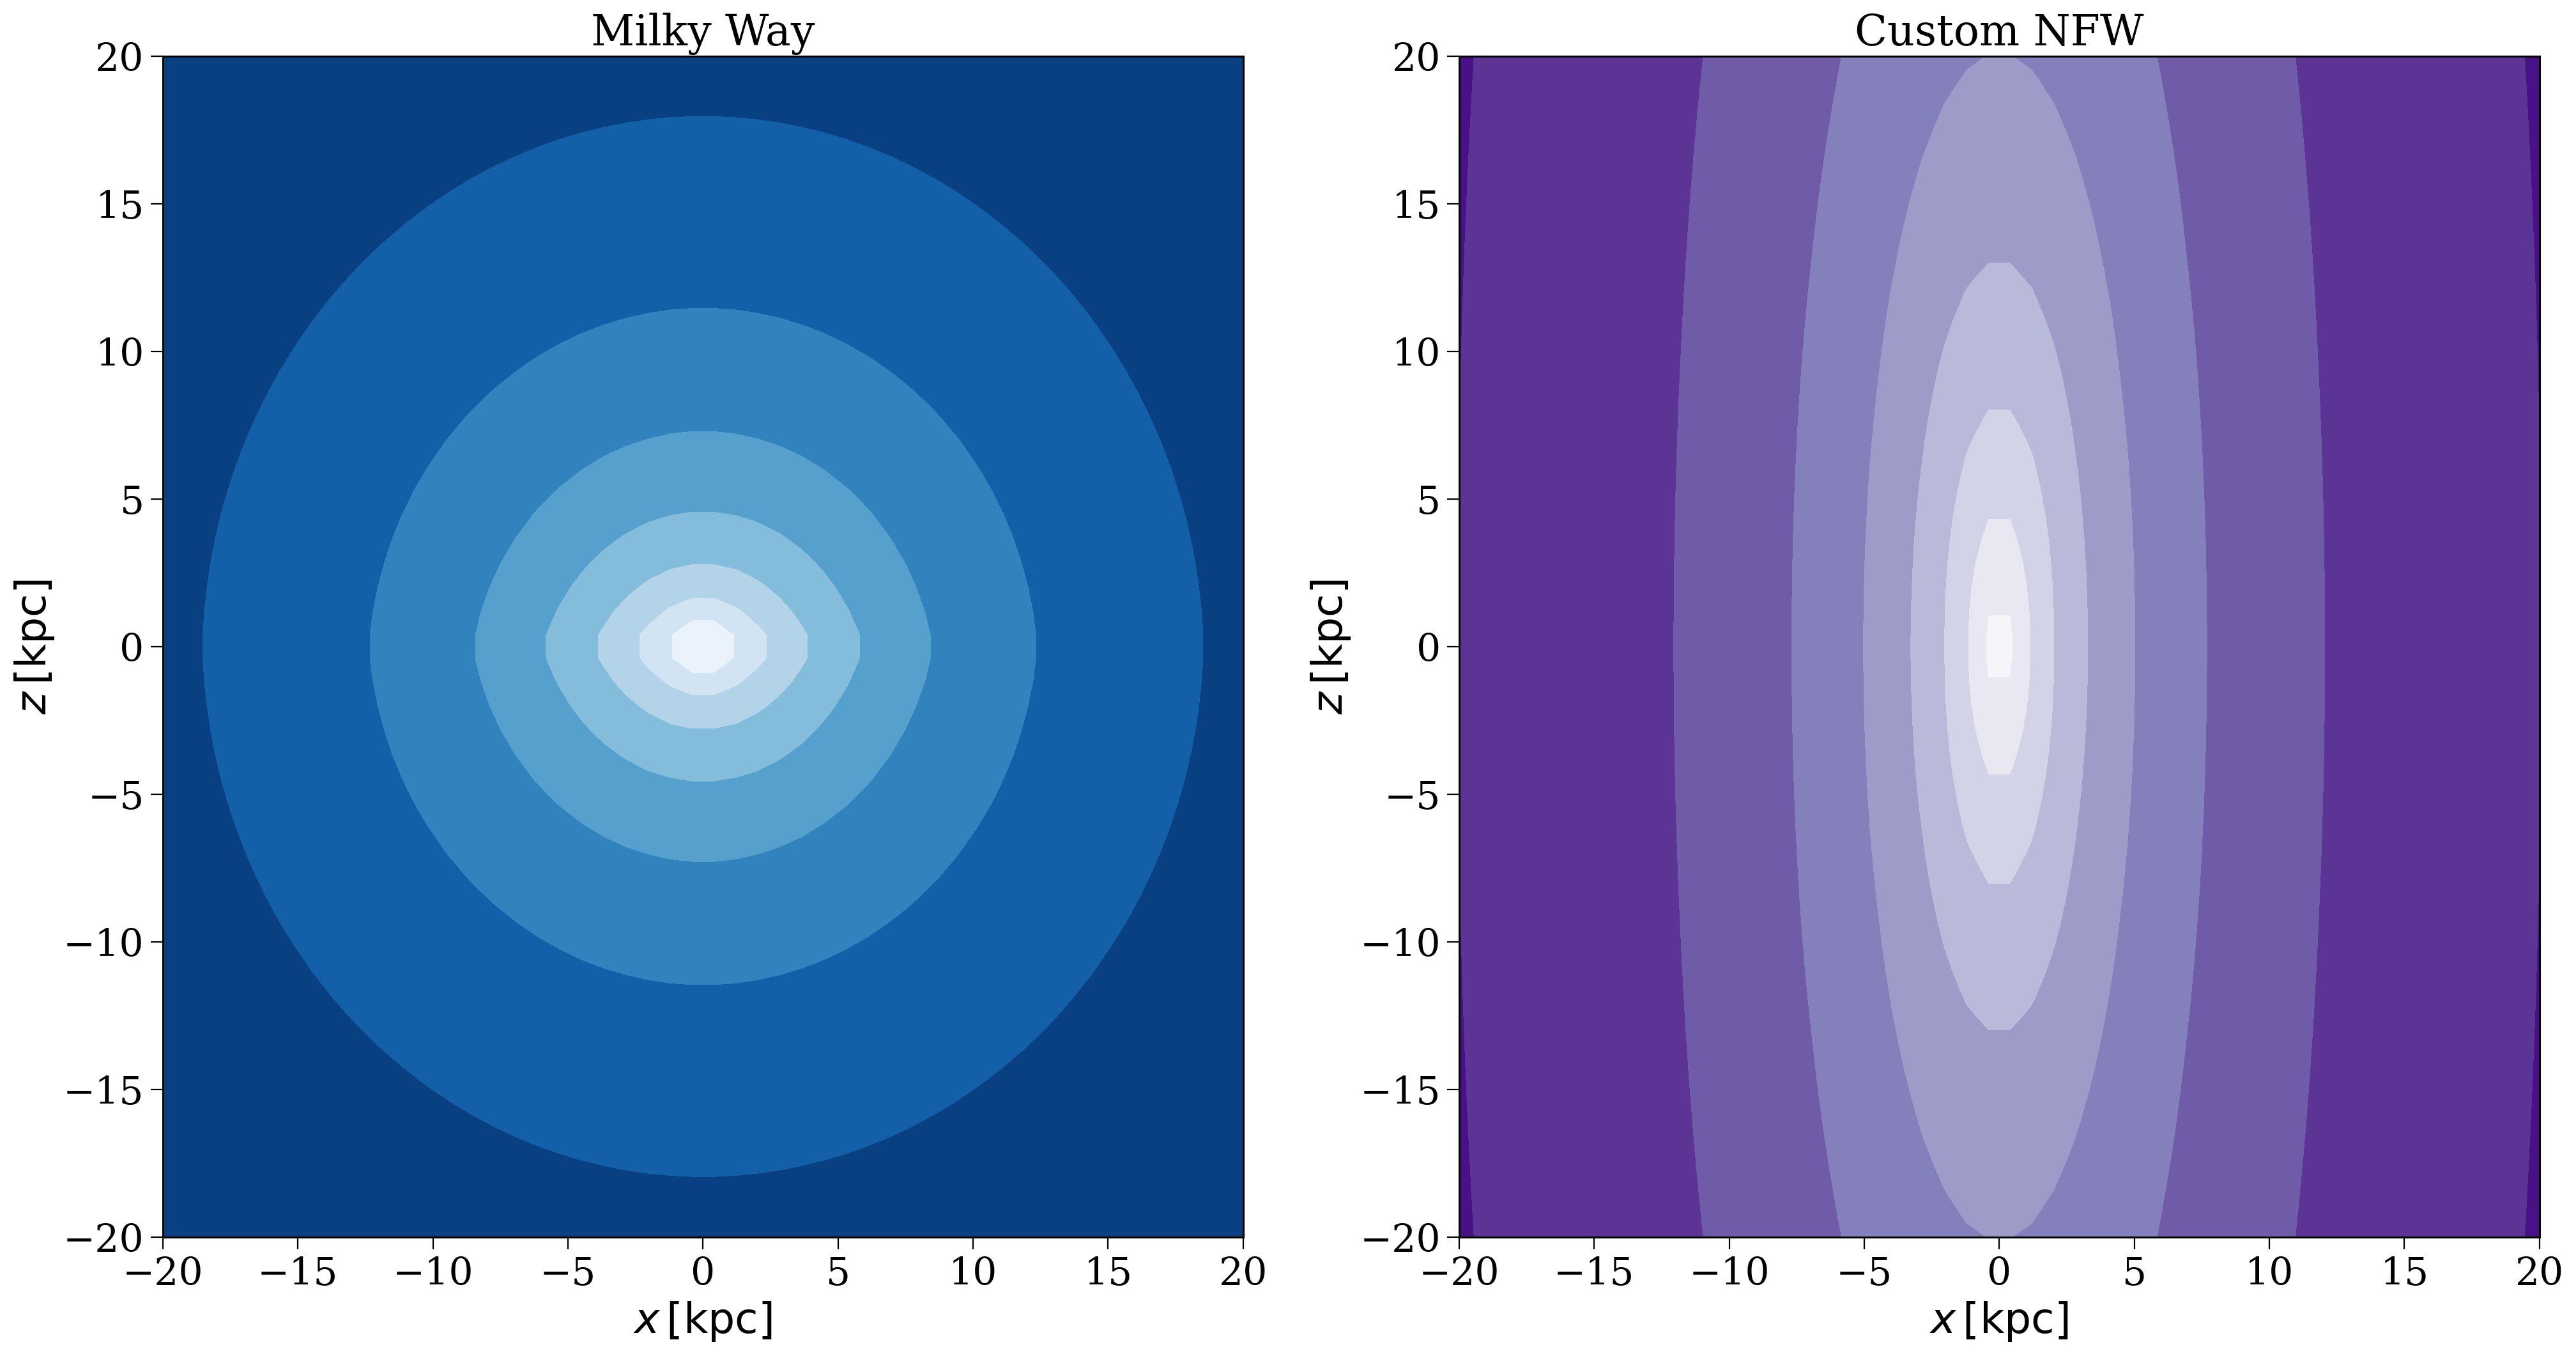

In [140]:
x = np.linspace(-20, 20, 50) * u.kpc
z = np.linspace(-20, 20, 50) * u.kpc

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

for pot, ax, label, cmap in zip([mw, nfw], axes, ["Milky Way", "Custom NFW"], ["Blues", "Purples"]):
    pot.plot_contours(grid=(x, 0, z), ax=ax, cmap=cmap);
    ax.set_title(label, fontsize=fs)
    ax.set(xlabel=r"$x \, [\rm kpc]$", ylabel=r"$z \, [\rm kpc]$")
plt.show()

In [141]:
p = cogsworth.pop.Population(1000, galactic_potential=mw)
p.create_population()
mw_final_pos = p.final_pos[:]

Run for 1000 binaries
Ended up with 1013 binaries with m1 > 0 solar masses
[4e-02s] Sample initial binaries
[1.0s] Evolve binaries (run COSMIC)


1016it [00:06, 168.42it/s]                                                                              


[8.1s] Get orbits (run gala)
Overall: 9.2s


In [142]:
p.galactic_potential = nfw
p.perform_galactic_evolution()
nfw_final_pos = p.final_pos[:]

1016it [00:03, 313.97it/s]                                                                              


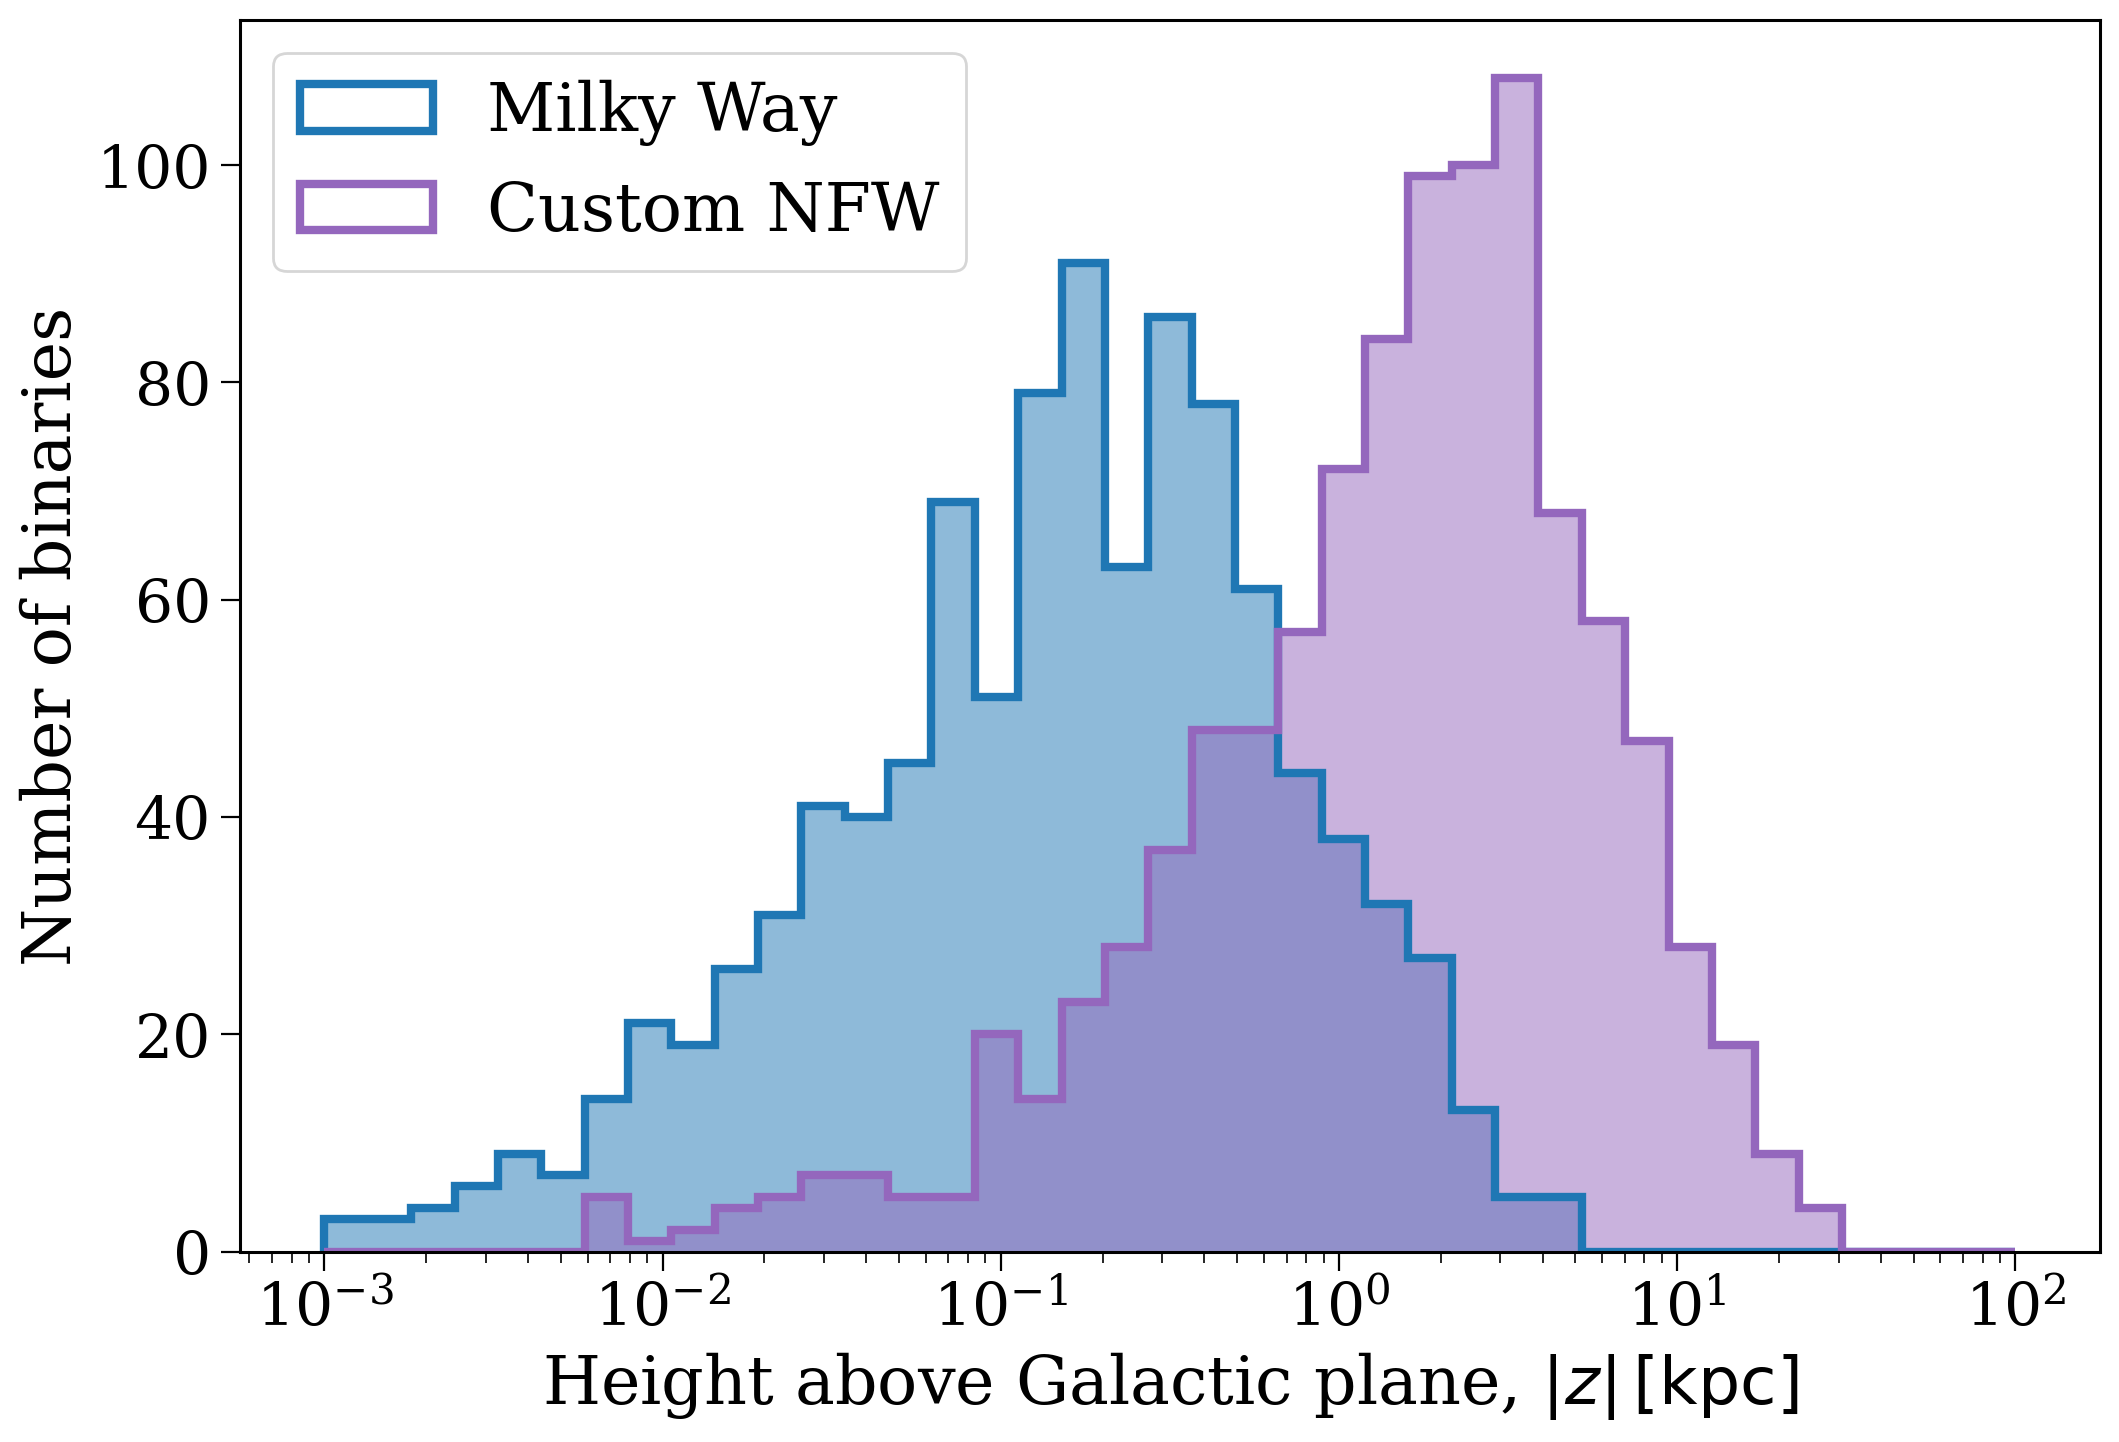

In [144]:
fig, ax = plt.subplots()
for final_pos, label, i in zip([mw_final_pos, nfw_final_pos],
                               ["Milky Way", "Custom NFW"],
                               [0, 4]):
    # histogram outline
    ax.hist(np.abs(final_pos[:, 2].to(u.kpc).value), bins=np.geomspace(1e-3, 1e2, 40),
            histtype="step", lw=3, color=f'C{i}', label=label)
    # transparent histogram fill
    ax.hist(np.abs(final_pos[:, 2].to(u.kpc).value), bins=np.geomspace(1e-3, 1e2, 40),
            alpha=0.5, color=f'C{i}')

ax.set(xscale="log", xlabel=r"Height above Galactic plane, $|z| \, [\rm kpc]$", ylabel="Number of binaries")
ax.legend()
plt.show()